In [19]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [20]:
from sklearn.datasets import load_wine
data = load_wine()
#print(data)
# importing or loading the dataset
#dataset = pd.read_csv('wine.csv')
 
# distributing the dataset into two components X and Y
X = data.data
print(X.shape)
y = data.target
print(y.shape)

(178, 13)
(178,)


In [21]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

(142, 13)
13


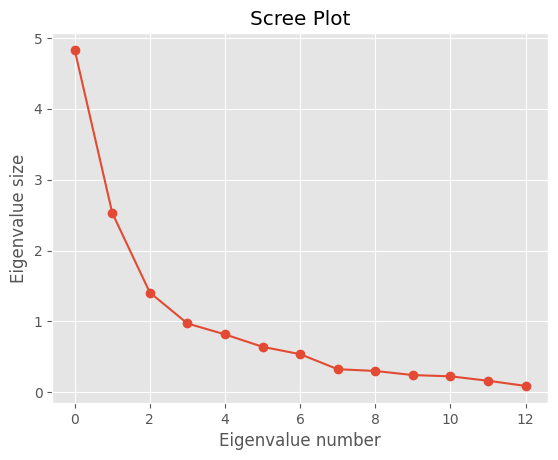

In [23]:
from matplotlib.ticker import PercentFormatter
TestPCAK = True
if TestPCAK:
  X_trainTT = X_train.copy()
  X_testTT = X_test.copy()
  # Applying PCA function on training
  # and testing set of X component
  from sklearn.decomposition import PCA

  pcaTT = PCA(n_components=0.999)
  
  #pca = PCA(n_components = 2)
  
  X_trainTT = pcaTT.fit_transform(X_trainTT)
  print(X_trainTT.shape)
  X_testTT = pcaTT.transform(X_testTT)
  
  explained_variance = pcaTT.explained_variance_ratio_
  print(pcaTT.n_components_)

  import matplotlib.pyplot as plt
  plt.style.use("ggplot") 
  plt.plot(pcaTT.explained_variance_, marker='o')
  plt.xlabel("Eigenvalue number")
  plt.ylabel("Eigenvalue size")
  plt.title("Scree Plot")

In [24]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

n_components = 2
pca = PCA(n_components=n_components) #to choise n_componets with test above
 
X_train = pca.fit_transform(X_train)
print(X_train.shape)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_
print(pca.n_components_)

(142, 2)
2


Text(0.5, 1.0, 'Scree Plot')

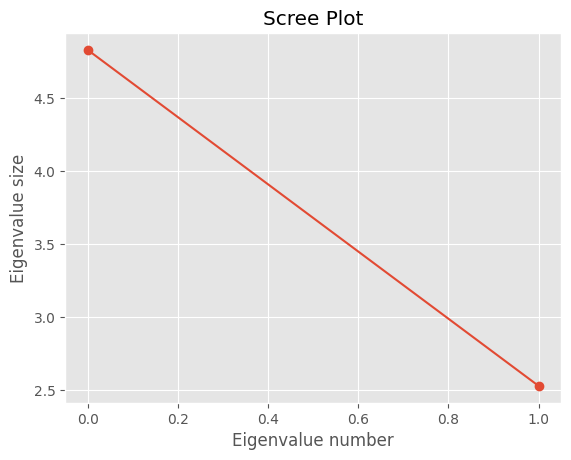

In [25]:
import matplotlib.pyplot as plt
plt.style.use("ggplot") 
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

In [26]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [27]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)

In [28]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)

<ipython-input-29-a1cf79e33e07>:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


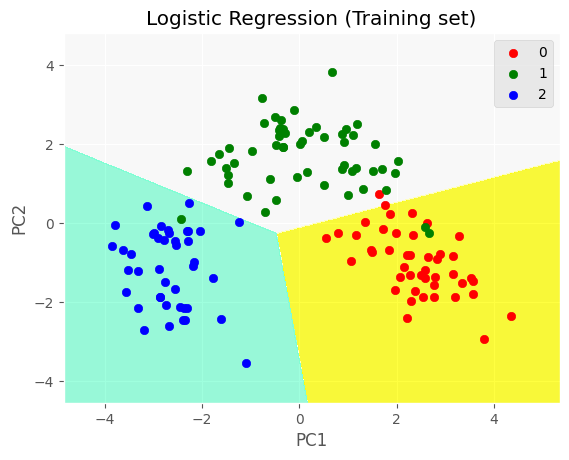

In [29]:
# Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap
if n_components == 2:
  X_set, y_set = X_train, y_train
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
            stop = X_set[:, 0].max() + 1, step = 0.01),
            np.arange(start = X_set[:, 1].min() - 1,
            stop = X_set[:, 1].max() + 1, step = 0.01))

  plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
        X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
        cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())

  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
          c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

  plt.title('Logistic Regression (Training set)')
  plt.xlabel('PC1') # for Xlabel
  plt.ylabel('PC2') # for Ylabel
  plt.legend() # to show legend

  # show scatter plot
  plt.show()



<ipython-input-30-d50155a4ca69>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


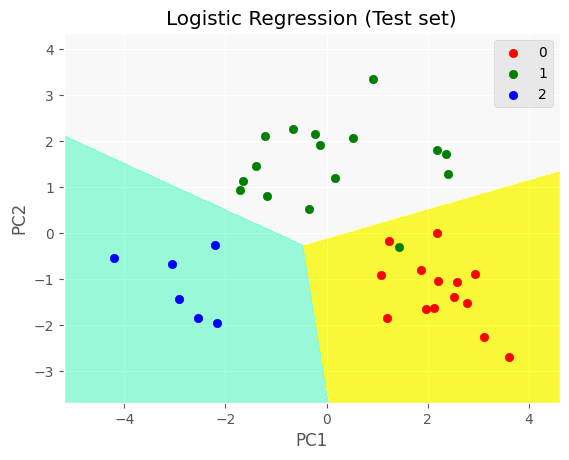

In [30]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap

if n_components == 2:
  X_set, y_set = X_test, y_test

  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
            stop = X_set[:, 0].max() + 1, step = 0.01),
            np.arange(start = X_set[:, 1].min() - 1,
            stop = X_set[:, 1].max() + 1, step = 0.01))

  plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
        X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
        cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())

  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
          c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

  # title for scatter plot
  plt.title('Logistic Regression (Test set)')
  plt.xlabel('PC1') # for Xlabel
  plt.ylabel('PC2') # for Ylabel
  plt.legend()

  # show scatter plot
  plt.show()

